# matplotlib

En aquest quadern veurem com realitzar gràfics en Python usant matplotlib.

Per començar, importam la llibreria amb la convenció usual, que és dir-ne **plt**.

In [1]:
import matplotlib.pyplot as plt

Importarem també **NumPy** com a **np**, per poder operar amb **ndarrays**.

In [2]:
import numpy as np

Cream un vector de zero a nou.

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

El representam gràficament.

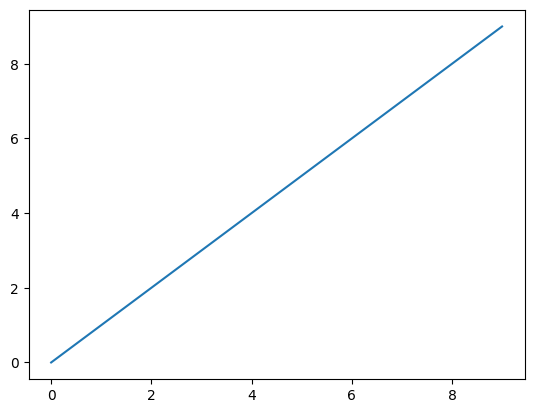

In [4]:
plt.plot(data)

Tenim moltes opcions per personalitzar el nostre gràfic.

Per exemple, podem posar-hi un marcador per a cada punt de la recta, canviar el color, a més de posar-li un títol al gràcic i una etiqueta als eixos.

Més endavant veurem com podem afegir aquests elements no directament al plot, sinó a zones (subplots) que hàgim definit a dins.

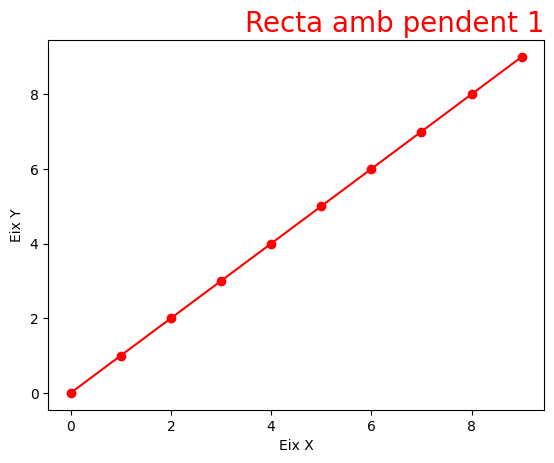

In [5]:
plt.title("Recta amb pendent 1", fontsize = 20, loc="right", color="r")
plt.xlabel("Eix X")
plt.ylabel("Eix Y")
plt.plot(data, marker='o', color='r')

Llibreries com **seaborn** o les funcions gràfiques de **pandas** gestionen molts dels detalls de la realització de gràfics. No obstant això, si volem anar una mica més enllà de les opcions que ofereixen, haurem d'entrar dins l'API de **matplotlib**.

## Figures i subplots

En matplotlib, els gràfics sempre són dins un objecte **Figure**. Es pot crear una nova figura amb `plt.figure`.

In [6]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Quan executam la cel·la anterior, veim la informació que s'ha creat una figura, però encara no la tenim representada gràficament. Faran falta un parell de comandes més.

`plt.figure` té una sèrie d'opcions. En particular, `figsize` controlarà la mida i relació d'aspecte de la imatge quan s'emmagatzemi al disc.

No podem fer cap gràfic amb una figura en blanc. Haurem d'afegir-hi qualque **subplot** amb `add_subplot`.

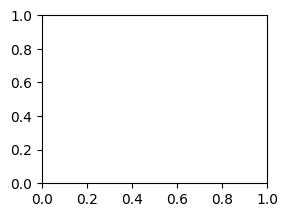

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)


La cel·la anterior indica que la figura contindrà 2x2 subplots, i estam definint-ne el primer.

A continuació en construirem dos més, els 2 i 3. Quedarà en blanc la regió corresponent al subplot 4.

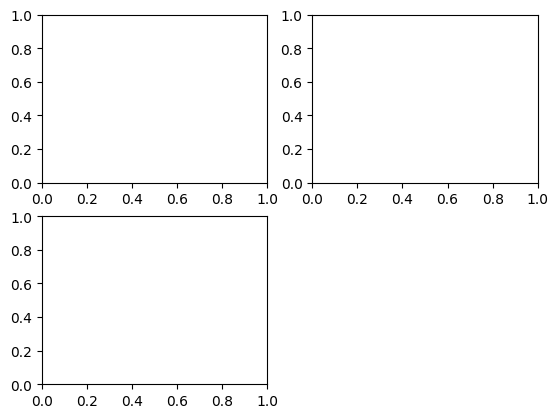

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

Amb la cel·la següent, definim un histograma (al mòdul de Sistemes de Big Data veim més detalls sobre què és un histograma) amb 20 classes o intervals (bins), un nigul de punts al voltant d'una recta, i un random walk.

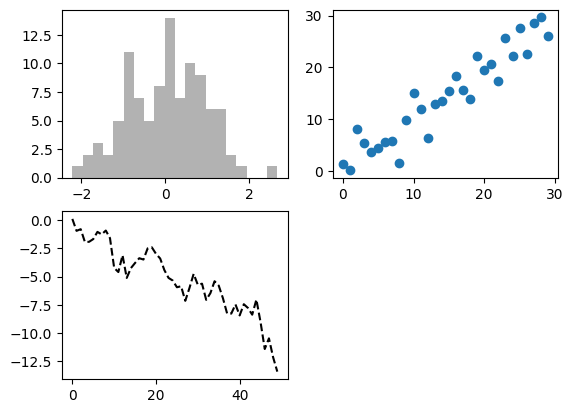

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha= 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(),'k--')

Crear una figura amb una graella de subgràfics és una tasca molt freqüent. Per això hi ha el mètode `plt.subplots`, que crea una nova figura i retorna un vector NumPy amb els subplots que s'han creat.

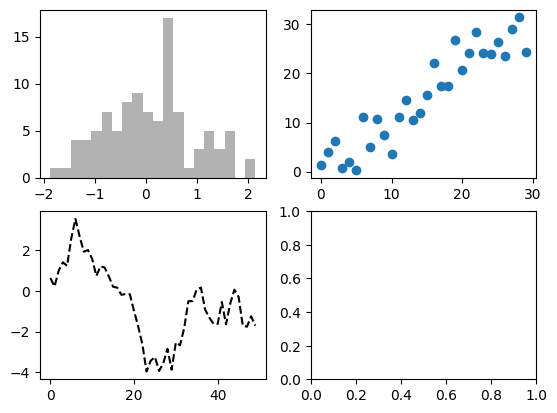

In [9]:
#Equival a les quatre primeres línies de la cel·la anterior
fig, axes = plt.subplots(2,2)

# Random walk.
# La funció randn extreu d'una gaussiana.
# cumsum calcula la suma acumulada
axes[1,0].plot(np.random.randn(50).cumsum(),'k--')

# recta y=x amb un soroll gaussià
axes[0,1].scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

# Capturam el retorn per evitar que mostri les dades.
# Podeu experimentar què passa si llevam l'assignació.
_ = axes[0,0].hist(np.random.randn(100), bins = 20, color = 'k', alpha= 0.3)


Això és molt útil, ja que es pot indexar axes com a vector bidimensional. També es pot indicar que els subplots han de tenir el mateix eix x o y amb sharex o sharey, respectivament. Això és especialment important quan es comparne dades de la mateixa escala. Si no ho feim així, matplotlib autoescala els límits de cada gràfic independentment.

Opcions de subplot

|Argument|Descripció|
|--------|----------|
|nrows|nombre de fileres de subgràfics|
|ncols|nombre de columnes de subgràfics|
|sharex|Tots els gràfics compartiran les mateixes marques a l'eix x|
|sharey|Tots els gràfics compartiran les mateixes marques a l'eix y|
|subplot_kw|Dict de keywords que es passen a add_subplot per crear cada subgràfic|
|**fig_kw|Keywords addicionals quan es crea la figura, com ara `plt.subplots(2,2,figsize=(8,6))`|


## Marges al voltant dels gràfics

Per defecte matplotlib deixa un cert farciment (*padding*) al voltant dels conjunt dels gràfics i també un espai entre els gràfics. Aquests espais s'especifiquen en relació a l'alçada i amplada del gràfic, de forma que si es reajusta el plot tant per programa com per la interfície d'usuari, el gràfic s'hi adaptarà dinàmicament. Es pot modificar l'espai amb el mètode subplots_adjust de l'objecte Figure, que també està disponible com a funció independent.

`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None,hspace=None)`

Els paràmetres `wspace` i `hspace` controlen el percentatge de l'amplada i l'alçada de la figura que s'utilitzarà com a espai entre els subgràfics. A l'exemple següent, aquest espai es redueix a zero. Podeu modificar-lo per posar-hi més espai. Per exemple, `wspace=.125` correspomdrà a un 12,5%.

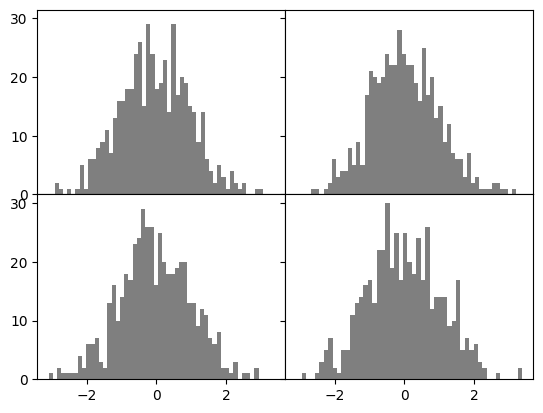

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

De vegades, però, ens pot interessar canviar la mida de tota la figura que volem representar, mitjançant els mètodes set_figheight i set_figwidth de la figura (en polzades):

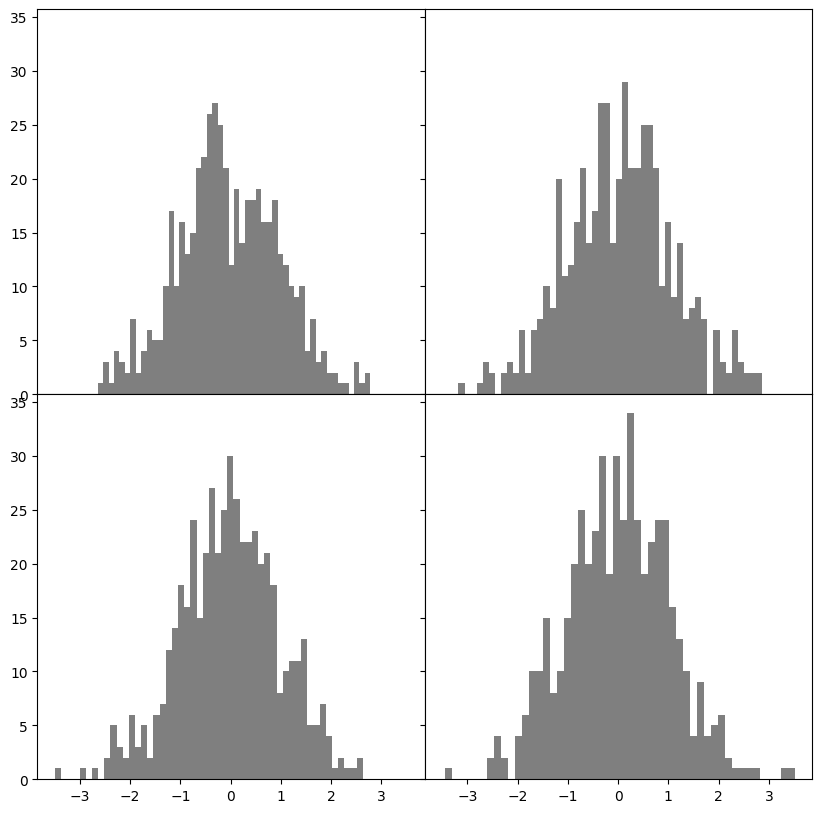

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_figheight(10)
fig.set_figwidth(10)

## Colors, marcadors i estils de línia

La funció principal de **matplotlib**, `plot`, accepta vectors de coordenades `x` i `y`; opcionalment, també una cadena abreviada que indica el color i estil de línia.

Per exemple, la següent cel·la fa un gràfic verd amb línia discontínua.

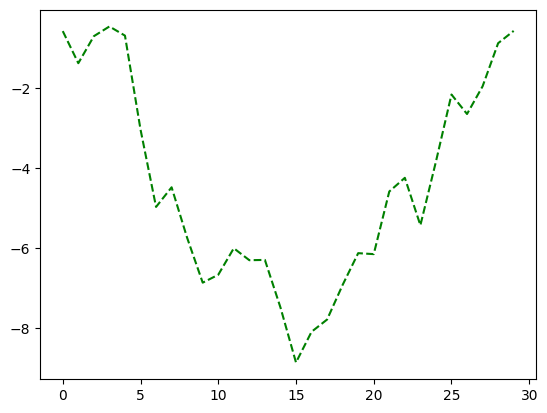

In [ ]:
x=range(30)
y=np.random.randn(30).cumsum()
plt.plot(x,y,'g--')

Es pot aconseguir el mateix escrivint-ho de forma més explícita.

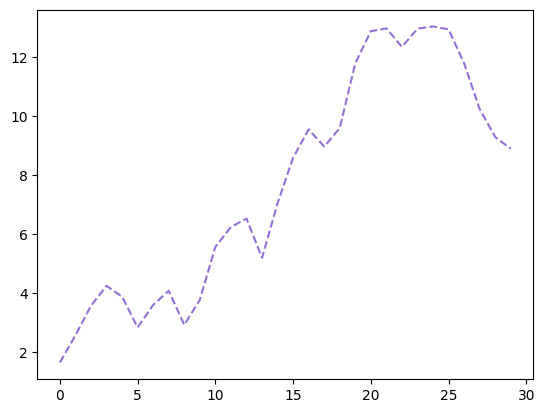

In [ ]:
plt.plot(range(30),np.random.randn(30).cumsum(), color='mediumpurple', linestyle='--')

Hi ha una sèrie d'abreviatures per als colors més habituals, i a més sempre podem indicar el color mitjançant el codi hexa.

Una paleta molt bàsica de vuit colors la formen els tres primaris, tres secundaris, més el blanc i el negre.

|Abreviatura de color| color|
|--------------------| -----|
|r|vermell|
|g|verd|
|b|blau|
|y|groc|
|m|magenta|
|c|cian|
|w|blanc|
|k|negre|



La cel·la següent ens mostra la seva expressió en components R, G i B, en tant per u. Observem que el verd només té el 50% de verd, més suau, i no el 100%.

In [ ]:
import matplotlib.colors as mcolors

print(mcolors.BASE_COLORS)

{'b': (0, 0, 1), 'g': (0, 0.5, 0), 'r': (1, 0, 0), 'c': (0, 0.75, 0.75), 'm': (0.75, 0, 0.75), 'y': (0.75, 0.75, 0), 'k': (0, 0, 0), 'w': (1, 1, 1)}


Si volem una paleta més matisada, hi ha també disponible la paleta següent.



In [ ]:
print(mcolors.TABLEAU_COLORS)

{'tab:blue': '#1f77b4', 'tab:orange': '#ff7f0e', 'tab:green': '#2ca02c', 'tab:red': '#d62728', 'tab:purple': '#9467bd', 'tab:brown': '#8c564b', 'tab:pink': '#e377c2', 'tab:gray': '#7f7f7f', 'tab:olive': '#bcbd22', 'tab:cyan': '#17becf'}


Aquí podeu ampliar la informació sobre [colors](https://matplotlib.org/stable/gallery/color/named_colors.html).

A més dels colors, els gràfics poden tenir **marcadors** per destacar els punts de dades. Com que matplotlib crea una línia contínua, interpolant entre els punts, de vegades no queda clar on hi ha els punts que corresponen a les dades. El marcador pot ser part de la cadena de l'estil, que tindrà color, marcador i estil de línia, en aquest ordre.

Per exemple, la cel·la següent crea una línia verda, amb cercles als punts i línia discontínua.

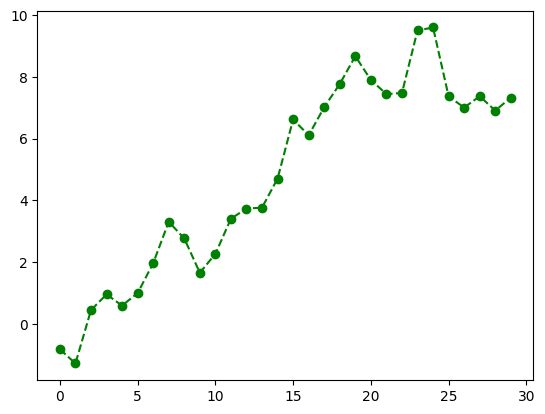

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(),'go--')

Podríem haver escrit el mateix de forma més explícita.

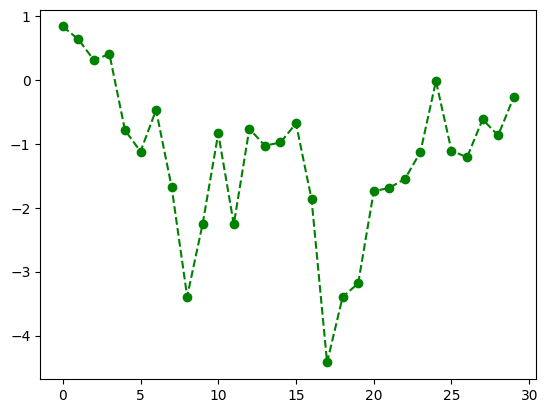

In [ ]:
plt.plot(randn(30).cumsum(),color='g',marker='o', linestyle='dashed')

En els gràfics de línies, els punts s'interpolen linealment, per defecte. Això es pot modificar amb l'opció `drawstyle`.

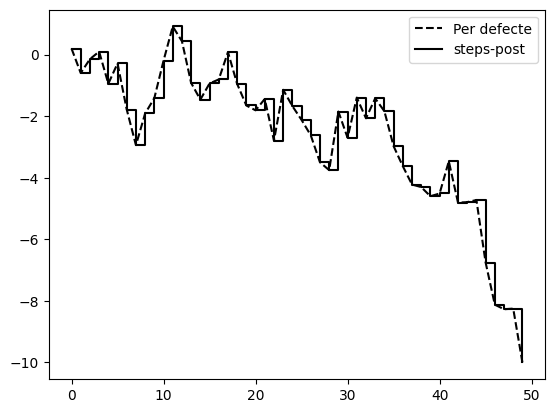

In [ ]:
y=np.random.randn(50).cumsum()

plt.plot(y, 'k--', label='Per defecte')
plt.plot(y, 'k-', drawstyle = 'steps-post', label='steps-post')

#Aquesta opció situa la llegenda al millor lloc possible, segons el gràfic.
#Executau la cel·la diverses vegades per observar quin efecte té.
plt.legend(loc='best')

## Marques dels eixos, etiquetes i llegendes

La majoria d'opcions dels gràfics es poden aconseguir de dues formes: usant la interfície procedural `pyplot` (matplotlib.pyplot) i l'API matplotlib nativa, més orientada a objectes.

La interfície pyplot, dissenyada per a l'ús interactiu, té mètodes com `xlim`, `xticks` i `xticklabels`. Es poden usar de dues formes:


*   Cridats sense arguments, retornen el valor actual del paràmetre (per exemple, plt.xlim() retorna el rang de l'eix x).
*   Cridats amb arguments, fixen els valors dels paràmetres (per exemple plt.xlim([0,10]) fixarà el rang de l'eix x entre 0 i 10.

Tots aquests mètodes actuen sobre l'AxesSubplot actiu o més recent. Cada un correspon a dos mètodes de l'objecte subplot mateix; en el cas de `xlim` són `ax.get_xlim` i `ax.set_xlim`. Quan treballam amb molts de subgràfics, pot ser més pràctic usar els mètodes de les instàncies de cada subplot, per claredat.

## Títol, marques d'eixos i etiquetes

Creem un gràfic d'un camí aleatori de 1000 passes.

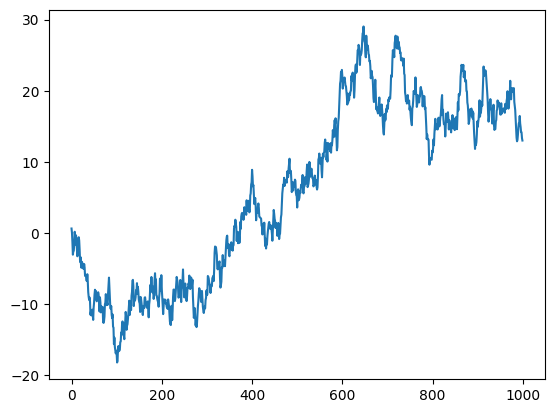

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
_ = ax.plot(np.random.randn(1000).cumsum())

Ara substituirem els nombres de l'eix de les x per uns textos que descriguin una mena d'etapa, per exemple: zero, u, dos, tres, quatre i cinc.

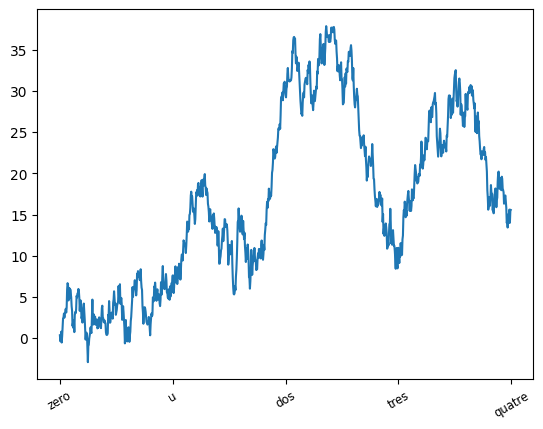

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['zero','u', 'dos', 'tres', 'quatre'], rotation=30, fontsize='small')


Finalment, afegim un títol al gràfic, a dalt, i un altre com a llegenda de l'eix x, a baix.

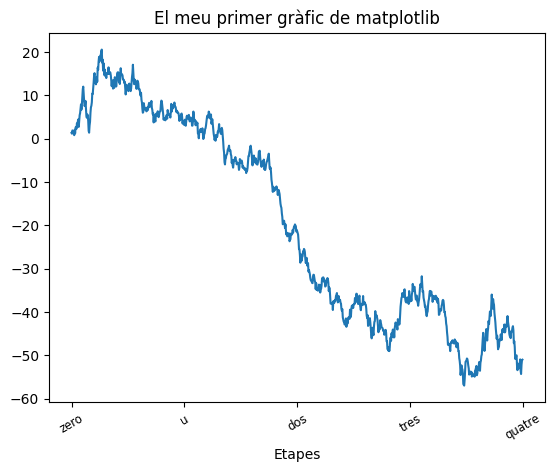

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['zero','u', 'dos', 'tres', 'quatre'], rotation=30, fontsize='small')
ax.set_title('El meu primer gràfic de matplotlib')
_=ax.set_xlabel('Etapes')

Per a l'eix y, es pot fer el mateix (ho podeu provar a qualsevol cel·la de codi, o creant-ne una altra).

També hi ha un mètode set que permet posar totes les propietats de cop. Per a l'exemple d'abans, ho hauríem pogut fer també així.

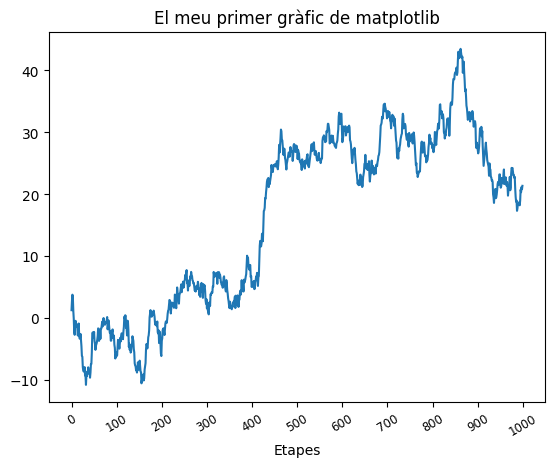

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['zero','u', 'dos', 'tres', 'quatre'], rotation=30, fontsize='small')

props = {
    'title': 'El meu primer gràfic de matplotlib',
    'xlabel': 'Etapes',
}
_=ax.set(**props)


## Llegendes

Les llegendes són un element important a l'hora d'identificar gràfics. La manera més senzilla de posar-les és com a paràmetre al moment de generar el gràfic. Per exemple, a continuació generam tres camins aleatoris amb colors de línia diferents, que distingirem justament per la llegenda.

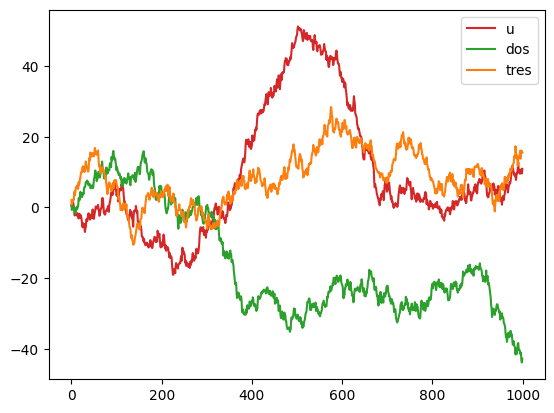

In [21]:
from numpy.random import randn

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'tab:red', label='u')
ax.plot(randn(1000).cumsum(), 'tab:green', label='dos')
ax.plot(randn(1000).cumsum(), 'tab:orange', label='tres')

ax.legend(loc='best')


Hi ha més opcions per a la posició de la llegenda; les podeu consultar [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

# Anotacions i dibuixos en un subgràfic

A l'exemple següent marcam tres esdeveniments importants sobre el gràfic de l'índex S&P500 de la borsa dels Estats Units. Per això feim servir les anotacions, amb el mètode `annotate`.

Observem com les dades dels tres punts crítics s'empaqueten en una llista de tuples, i com les propietats de les fletxes són una estructura de dades diccionari (`dict`).

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

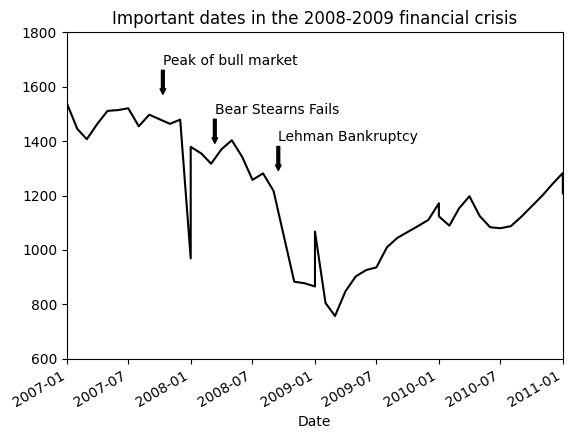

In [23]:
import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500/master/data/data.csv',index_col=0,parse_dates=True)
spx=data['SP500']

# Ensure the index (dates) is sorted in ascending order # ! CHATGPT
spx = spx.sort_index()

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
        horizontalalignment='left',
        verticalalignment='top'
    )
# Zoom in on 2007-2010

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

En ocasions, ens pot interessar afegir dibuixos geomètrics als gràfics de matplotlib. Aquí presentam un exemple amb figures senzilles. Observem que el cercle es mostra com una el·lipse, a causa de l'estirament diferent dels eixos x i y.

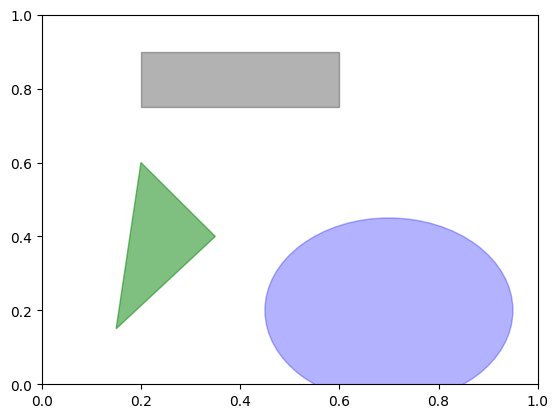

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Emmagatzemar els fitxers a disc

Es pot desar la figura actual a disc usant plt.savefig. Aquest mètode és equivalent al mètode d'instància savefig en l'objecte de la figura.

Com que estam fent feina als servidors de Google, tenim dues opcions per guardar el ftxer.

1) Podem descarregar el fitxer amb el mètode files.download

2) Podem muntar la nostra unitat de Google Drive i guardar-lo allà

Opció 1:

In [ ]:
from google.colab import files
fig.savefig("imatge.png")
files.download("imatge.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Opció 2:

In [ ]:
#montam la nostra unitat de Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Guardam la imatge a l'arrel de la nostra unitat
images_dir = '/content/gdrive/My Drive'
fig.savefig(f"{images_dir}/imatge.png")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
